<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/main/CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [494]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Data Loading

In [495]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [497]:
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [498]:
df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [499]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print(df.isnull().sum())

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

In [500]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [502]:
df['Total Expenditure'] = df[['Total Food Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']].sum(axis=1)

df['Essential Expenditure'] = df[['Total Food Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Communication Expenditure', 'Education Expenditure']].sum(axis=1)

df['Non-Essential Expenditure'] = df[['Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']].sum(axis=1)

df['Total Income'] = df['Total Household Income'] + df['Total Income from Entrepreneurial Acitivites']

df['Savings'] = df['Total Income'] - df['Total Expenditure']


In [503]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)  
outlier_preds = iso.fit_predict(df[num_cols])

df['Outlier'] = outlier_preds  
print(df['Outlier'].value_counts())

Outlier
 1    39466
-1     2078
Name: count, dtype: int64


In [504]:
df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])

print(f"Original dataset size: {df.shape}")
print(f"New dataset size after removing outliers: {df_cleaned.shape}")

Original dataset size: (41544, 66)
New dataset size after removing outliers: (39466, 65)


# Data Preprocessing

In [505]:
scaler = StandardScaler()
num_cols = df_cleaned.select_dtypes(include=['int64']).columns
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [506]:
encoder = LabelEncoder()
label_cols = ['Household Head Sex', 'Household Head Marital Status', 'Household Head Job or Business Indicator']
for col in label_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

onehot = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
encoded_cols = onehot.fit_transform(df_cleaned[cat_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=onehot.get_feature_names_out(cat_cols))
df_cleaned = df_cleaned.drop(columns=(list(cat_cols) + label_cols)).reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)

In [507]:
df_cleaned = df_cleaned.astype(np.float32)

In [508]:
import numpy as np

# Check for NaN values
print("NaN values in dataset:", df.isna().sum().sum())

# Check for infinite values
print("Infinite values in dataset:", np.isinf(df_cleaned).sum().sum())

# Check for very large values
print("Max value:", df_cleaned.max().max())
print("Min value:", df_cleaned.min().min())

NaN values in dataset: 0
Infinite values in dataset: 0
Max value: 107.92758
Min value: -11.045054


In [509]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39466 entries, 0 to 39465
Columns: 526 entries, Total Household Income to Main Source of Water Supply_Unprotected spring, river, stream, etc
dtypes: float32(526)
memory usage: 79.2 MB


In [510]:
df.isnull().sum()

Total Household Income              0
Region                              0
Total Food Expenditure              0
Main Source of Income               0
Agricultural Household indicator    0
                                   ..
Essential Expenditure               0
Non-Essential Expenditure           0
Total Income                        0
Savings                             0
Outlier                             0
Length: 66, dtype: int64

In [534]:
from sklearn.decomposition import PCA

def best_num_components(data, variance_threshold=0.9):
    pca = PCA()
    pca.fit(data)
    cumulative_variance = pca.explained_variance_ratio_.cumsum()
    num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    return num_components, cumulative_variance, pca.explained_variance_ratio_

num_components = best_num_components(df_cleaned)
print(f"Number of components to keep 95% variance: {num_components}")



Number of components to keep 95% variance: (np.int64(42), array([0.22327621, 0.29294968, 0.337261  , 0.37083396, 0.39952964,
       0.42809907, 0.4533482 , 0.47577935, 0.49798462, 0.51860964,
       0.53798896, 0.5561043 , 0.5737632 , 0.59089994, 0.6071766 ,
       0.6227424 , 0.63819957, 0.6535098 , 0.66824013, 0.68217283,
       0.6958475 , 0.70928234, 0.722473  , 0.73554164, 0.7484392 ,
       0.7608052 , 0.773023  , 0.78445995, 0.7957096 , 0.8068088 ,
       0.8174597 , 0.8276716 , 0.8372593 , 0.84663945, 0.8558922 ,
       0.8644679 , 0.8728442 , 0.8807212 , 0.88836545, 0.89461344,
       0.8999134 , 0.90470165, 0.90939236, 0.9137774 , 0.91781723,
       0.9213695 , 0.924897  , 0.9281195 , 0.9311449 , 0.9340465 ,
       0.936593  , 0.93903446, 0.9414147 , 0.9435889 , 0.9455454 ,
       0.94733113, 0.9490548 , 0.95060754, 0.9520806 , 0.9535236 ,
       0.954917  , 0.9561845 , 0.9574399 , 0.9586592 , 0.9598252 ,
       0.9609537 , 0.96197826, 0.9629815 , 0.9639809 , 0.9649455 ,
    

Number of components to keep 95% variance: 42


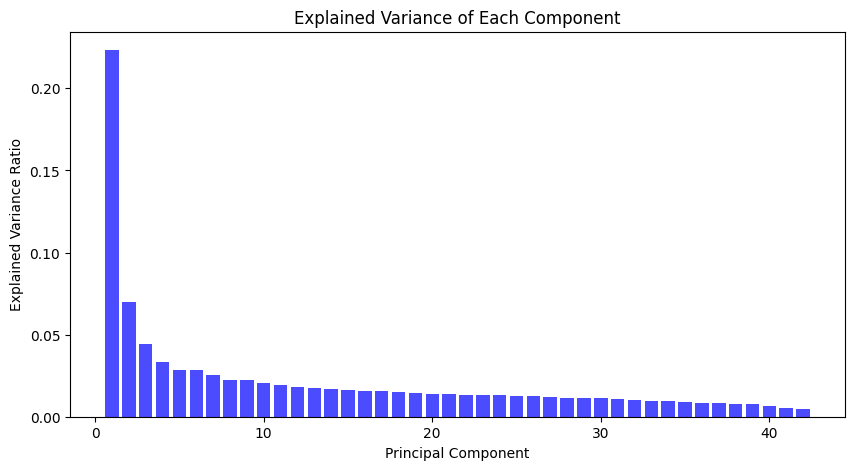

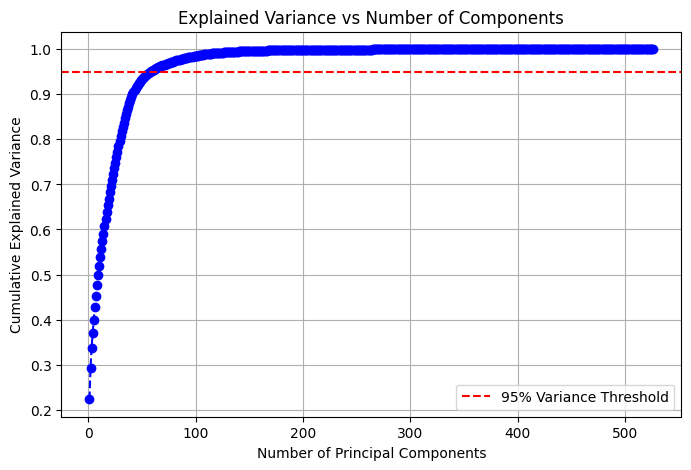

In [535]:
num_components, cumulative_variance, explained_variance = best_num_components(df_cleaned)
print(f"Number of components to keep 95% variance: {num_components}")

pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(df_cleaned)

plt.figure(figsize=(10, 5))
plt.bar(range(1, num_components + 1), explained_variance[:num_components], alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Component')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()

# Clustering Models

### K-Means Clustering

For cluster = 2, SSE/WCSS is 1665148.25
For cluster = 3, SSE/WCSS is 1573646.75
For cluster = 4, SSE/WCSS is 1519748.25
For cluster = 5, SSE/WCSS is 1481189.5
For cluster = 6, SSE/WCSS is 1447165.0
For cluster = 7, SSE/WCSS is 1416421.25
For cluster = 8, SSE/WCSS is 1391132.625
For cluster = 9, SSE/WCSS is 1368108.625
For cluster = 10, SSE/WCSS is 1349740.625


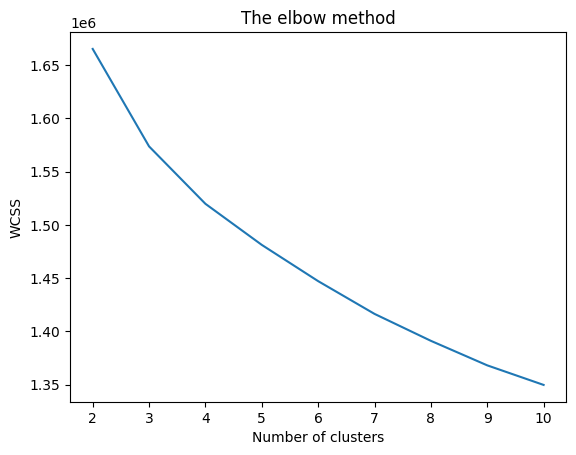

In [536]:
from sklearn.cluster import KMeans

wcss=[]
sse={}
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For K = 2, WCSS = 1665148.25, Silhouette Score = 0.2773
For K = 3, WCSS = 1573646.75, Silhouette Score = 0.1055
For K = 4, WCSS = 1519748.25, Silhouette Score = 0.0519
For K = 5, WCSS = 1481189.50, Silhouette Score = 0.0525
For K = 6, WCSS = 1447165.00, Silhouette Score = 0.0523
For K = 7, WCSS = 1416421.25, Silhouette Score = 0.0543
For K = 8, WCSS = 1391132.62, Silhouette Score = 0.0394
For K = 9, WCSS = 1368108.62, Silhouette Score = 0.0430
For K = 10, WCSS = 1349740.62, Silhouette Score = 0.0380


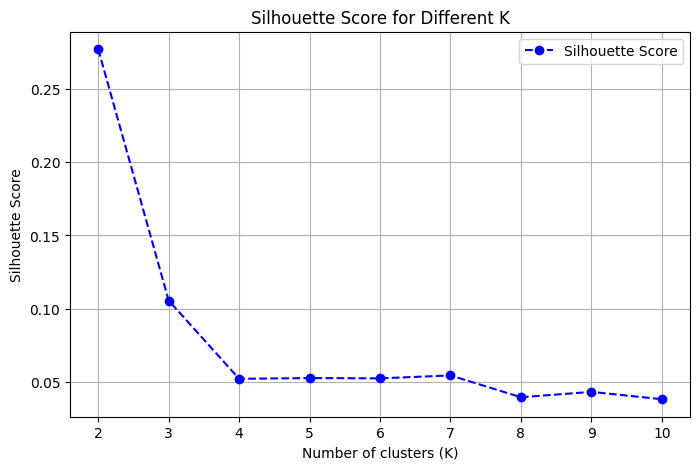

In [537]:
wcss = []
silhouette_scores = []
sse = {}

k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    
    wcss.append(kmeans.inertia_)
    sse[k] = kmeans.inertia_
    
    score = silhouette_score(X_pca, labels, metric='euclidean')
    silhouette_scores.append(score)
    
    print(f"For K = {k}, WCSS = {sse[k]:.2f}, Silhouette Score = {score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b', label="Silhouette Score")
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [538]:
from sklearn.cluster import DBSCAN

def find_best_dbscan_params(X, radius_range, min_samples_range):

    best_score = -1
    best_params = {}

    for radius in radius_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=radius, min_samples=min_samples)
            try:
                labels = dbscan.fit_predict(X)
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                if n_clusters >= 2:
                    score = silhouette_score(X, labels)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            "radius": radius,
                            "min_samples": min_samples,
                            "silhouette_score": score,
                            "n_clusters": n_clusters
                        }
            except ValueError as e:
                print(f"Error with radius={radius}, min_samples={min_samples}: {e}")

    return best_params

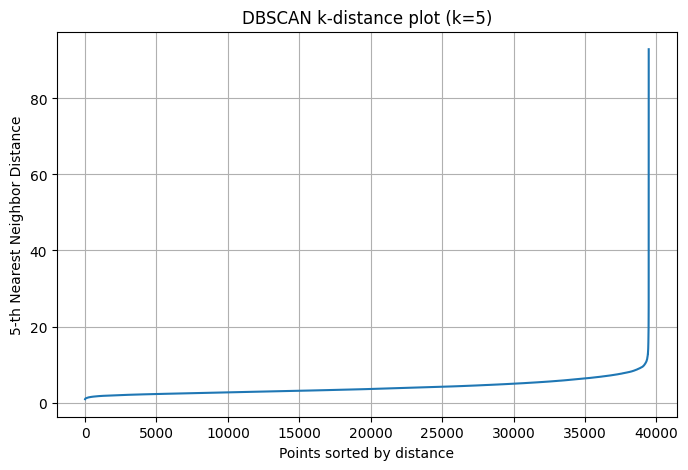

Suggested eps for DBSCAN: 6.5577


In [539]:
from sklearn.neighbors import NearestNeighbors

def find_optimal_eps(data, k=5):
    # Compute k-nearest neighbors distances
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    # Sort the k-th nearest neighbor distances
    k_distances = np.sort(distances[:, k-1])

    # Plot the k-distance graph
    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{k}-th Nearest Neighbor Distance")
    plt.title(f"DBSCAN k-distance plot (k={k})")
    plt.grid(True)
    plt.show()

    # Suggest a reasonable eps based on the elbow method
    return k_distances[int(len(k_distances) * 0.9)]  # Suggesting the 90th percentile

# Example usage on your PCA-transformed data
optimal_eps = find_optimal_eps(X_pca, k=5)
print(f"Suggested eps for DBSCAN: {optimal_eps:.4f}")

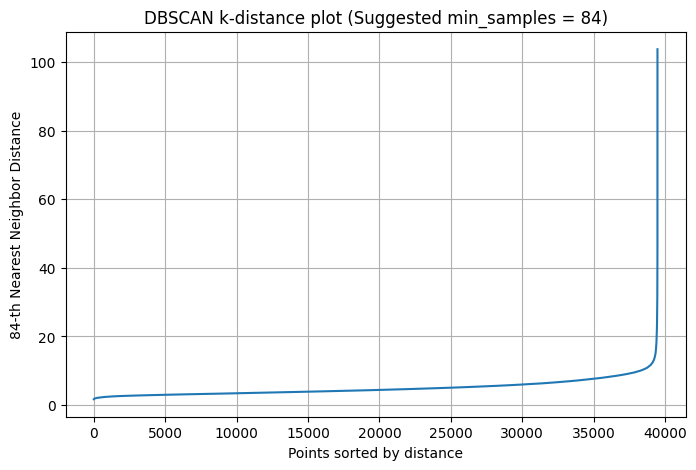

Suggested min_samples for DBSCAN: 84


In [540]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def find_best_min_samples(data):

    n_features = data.shape[1]
    suggested_min_samples = max(2, int(2 * n_features))  # Ensure at least 2
    
    # Compute k-nearest neighbors distances
    neigh = NearestNeighbors(n_neighbors=suggested_min_samples)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)

    # Sort the k-th nearest neighbor distances
    k_distances = np.sort(distances[:, suggested_min_samples - 1])

    # Plot the k-distance graph
    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{suggested_min_samples}-th Nearest Neighbor Distance")
    plt.title(f"DBSCAN k-distance plot (Suggested min_samples = {suggested_min_samples})")
    plt.grid(True)
    plt.show()

    return suggested_min_samples

# Example usage
optimal_min_samples = find_best_min_samples(X_pca)
print(f"Suggested min_samples for DBSCAN: {optimal_min_samples}")

In [541]:
radius_range = np.linspace(0.2, 0.3, 10)
min_samples_range = range(2, 17)

best_params = find_best_dbscan_params(X_pca, radius_range, min_samples_range)
print(best_params)

KeyboardInterrupt: 

In [ ]:
db = DBSCAN(eps = 7, min_samples = 84)
model = db.fit(X_pca)
labels = db.labels_

print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print(f"Silhouette Score: {silhouette_score(X_pca, labels):.4f}")